# Chapter 12-1. Linear Regression

Linear regression 은 두 변수간의 관계를 측정하는 기술이다. DATA 에 가장 들어맞는 독립변수 X 와 종속변수 Y 간의 $Y = \alpha + \beta X$ 관계이다. python 의 statsmodels library 에 linear fit 함수가 제공된다. 이 함수는 가장 잘 맞는 line 을 찾아준다. 아울러 검증 가능한 R-squared 나 F value 도 제공한다.

In [2]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import pandas as pd
from googlefinance.client import get_price_data, get_prices_data

다음과 같이 linear regression 을 수행하고 그 결과를 plot 하는 함수를 작성한다.

In [4]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)              # Adds a column of ones to an array
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]                  # alpha 
    b = model.params[1]                  # beta
    # colume of ones 제거  [ 1.00000000e+00 -8.86191002e-03], [1.00000000e+00  1.24397707e-02],,,
    X = X[:, 1]                                 
    
    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)  # [-0.02283195 -0.02235874 ,,,,,,,, 0.02354202  0.02401522]
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

테슬라(TSLA) 와 S&P 500 (SPY) 을 가져와 regression 을 수행한다.

In [5]:
param = {
    'q': "TSLA", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASDAQ", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "10Y" # Period (Ex: "1Y" = 1 year)
}
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2015-01-01')
asset = get_price_data(param)['Close'].loc[start : end]

In [6]:
params = [
    # S&P 500
    {
        'q': ".INX",
        'x': "INDEXSP",
    }
]
period = "10Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)

start = pd.to_datetime('2014-01-01').date()
end = pd.to_datetime('2014-12-31').date()
# get price data (return pandas dataframe)
benchmark = get_prices_data(params, period)['.INX_Close'].loc[start : end]              

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     62.90
Date:                Mon, 21 May 2018   Prob (F-statistic):           7.35e-14
Time:                        00:39:47   Log-Likelihood:                 548.62
No. Observations:                 251   AIC:                            -1093.
Df Residuals:                     249   BIC:                            -1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.614      0.540      -0.002       0.004
x1             1.9171      0.242      7.931      0.000       1.441       2.393
==============================================================================
Omnibus:                       66.202   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.954
Skew:                           0.885   Prob(JB):                     5.71e-85
Kurtosis:                       8.828   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

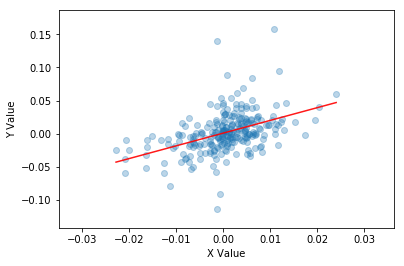

In [7]:
# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]           # daily return TSLA
r_b = benchmark.pct_change()[1:]   # daily return of  SPY

linreg(r_b.values, r_a.values)

Prob (F-statistic) : linear regression 에서의 p-value 에 해당. p-value 란 예측을 수행하여 얻은 결과가 실제로 predictive 하지 않을 확률을 말하므로,  p-value 가 매우 낮기를 원하게 된다(<0.05). 따라서, Prob(F-statisitc) 값이 7.35e-14 라는 0.05 보다 작으므로 테슬라의 daily return 이 market 의 daily return 에 의해 predictive 하다는 것을 의미한다. 만약 F-statistic 이나 p-value 가 > 0.05 이면 data 에 문제 있으므로 TEST stop.

여기서 alpha = 0.0011, beta = 1.9171  이다. 이 것은 평균적으로 S&P 500 이 1 % 오르면 Tesla 는 두배 오른다는 것을 보여준다. 그러나 Y 축 (Tesla) daily return 은 -0.1 ~ 0.1 사이로 20 % 폭에 daily return 이 걸쳐있고, S&P 는 -0.02~0.02 사이로 4 % 폭에 걸쳐 있으므로  Tesla 가 더 volatile  한 asset 임을 알 수 있다. 예를 들어 S&P 가 2% 오른 날, Tesla 는 4% 올랐다. 반면 S&P 가 2% 떨어지면 Tesla 는 4% 떨어진다.

Tesla 의 beta 1.9171 은 2014 년의 data 를 기준한 것이므로 timeframe 이 달라지면 beta 도 달라진다.

### Linear Regression vs. Correlation

* Linear regression 은 특정한 linear model 을 제공해 주지만 linear dependency 가 있는 경우에 한 한다.
* 반면, Correlation 은 linear 와 non-linear dedendency 모두에 일반 적용되지만 실제 model 을 제공하지는 않는다.
* 두가지 모두 covariance 의 측정 수단이다.
* Linear regression 은 Y 값과 다수의 독립변수와의 관계도 X multidimension 으로 비교적 쉽게 제공(각 X 에 대해 beta1, beta2, beta3,..., finance 에서는 factor model 이라 부름) 하지만 Correlation 은 multiple X 축과의 관계를 설명하지 못한다. 

### Knowing Parameters vs. Estimates

linear regression 에서 얻은 모든 $\alpha$ 와 $\beta$ parameter 는 추측일 뿐이고 측정 기간에 따라 항상 달라진다는 것을 명심.

Ordinary Least Squares (OLS) : regression line 과 actual value 간의 distance 가 최소가 되도록 a 와 b 를 optimize 하는 numerical 함수 제공.
$$\sum_{n=1}^{n}(Y_i - a - bX_i)^2$$

### OLS 예제
두개의 완전한 random 변수로 linear regression test.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7936
Date:                Mon, 21 May 2018   Prob (F-statistic):              0.375
Time:                        00:42:08   Log-Likelihood:                -9.5135
No. Observations:                 100   AIC:                             23.03
Df Residuals:                      98   BIC:                             28.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4023      0.053      7.642      0.000       0.298       0.507
x1             0.0796      0.089      0.891      0.375      -0.098       0.257
==============================================================================
Omnibus:                       14.885   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.028
Skew:                           0.228   Prob(JB):                       0.0810
Kurtosis:                       2.000   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

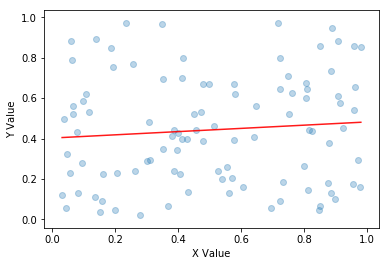

In [8]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

p-value(F-statistic) 이 0.05 보다 크므로 의미 없는 data 이므로 더 볼 것 없음. 이유는 randomly generated 되었으므로 relation 이 없음을 p-value 와 visualization 으로 확인 (line 이 있다고 현혹되지 말 것)

Y 가 약간의 random noise 를 준 X 에 종속되는 경우 예제

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     162.4
Date:                Mon, 21 May 2018   Prob (F-statistic):           1.62e-22
Time:                        00:42:47   Log-Likelihood:                 7.7724
No. Observations:                 100   AIC:                            -11.54
Df Residuals:                      98   BIC:                            -6.334
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.044      0.329      0.743      -0.073       0.102
x1             0.9576      0.075     12.743      0.000       0.808       1.107
==============================================================================
Omnibus:                        0.047   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.135
Skew:                           0.049   Prob(JB):                        0.935
Kurtosis:                       2.849   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

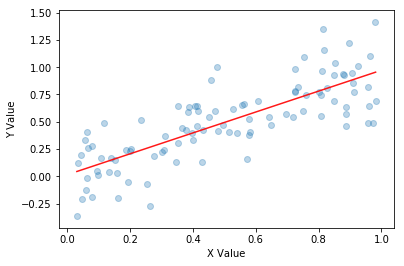

In [9]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y)

# 평가 및 결과 report

regression model 은 다음을 가정함:
* 독립변수 X 는 random 하지 않음.
* error term(잔차항) 의 variance 가 전체 측정치에 걸쳐서 일정함. fit 를 하기위해 중요.
* error 는 자기상관관계 (autocorrelated) 없음. Durbin-Watson statistic 값이 2 에 가까우면 autocorrelation 없음.
* error 는 정규분포 되어있음. 그렇지 않으면 F-test 와 같은 통계를 사용할 수 없다.

위 가정이 맞을 경우, fit 을 분석하기 위한 통계 report 를 사용할 수 있다. 예를 들어, $R^2$ 값은 model 에 의해 설명되는 $Y$ 의 variation 의 분수 값을 알려준다. 

 * 자기상관 현상은 연속적인 일련의 관측치들이 서로 상관되어 있을 때, 하나의 잔차항의 크기가 이웃하는 다른 잔차항의 크기와 서로 일정한 관련이 있을
때 일어난다. 자기상관 현상은 주로 시계열 데이터에서 발생한다

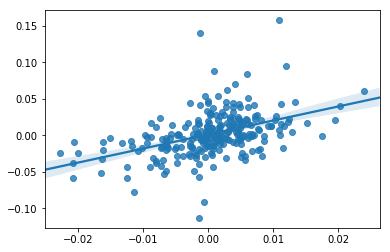

In [11]:
import seaborn

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

seaborn.regplot(r_b.values, r_a.values);